In [80]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.api as sm 
import scipy.stats as stat
import seaborn as sns 
import pydotplus 
import graphviz

from sklearn import linear_model as linModel
from scipy.stats import bartlett, levene
from sklearn import tree
from IPython.display import Image
from statsmodels.tsa.stattools import acf 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV

In [81]:
technology_df = pd.read_csv('Technologies et Pratiques de Gestion.csv', header = 0)
copy_tech_df = pd.read_csv('Technologies et Pratiques de Gestion.csv', header = 0)

In [82]:
technology_df.head()

,KeyValue,Date,DernierJourDuTrimestre,Activite,Localisation,NomDeTechnologie,TypeDeTechnologie,PhaseDeTechnologie,TypeDeRecipiendaire,Superficie,...,NombredAnimaux,CodeDeMenage,NomPrenomdAgriculteur,Sexe,Age,Contact,TypeDeMenage,NouveauContinue,TechnologieAppliquee,DonneesNettoyees
0,2075,29 Mar 2018,31 Mar 2018,SMARTE,Bureau de Faranah (Exemple de localisation à...,Pilon amélioré,Gestion de l'irrigation et de l'eau (Irrigatio...,Disponible a l'utilisation (Made available for...,Producteurs (Producers),0.0000,...,0.0,GN-F-3-3.3-SC/1973/00655,Soba Condé,Femme (Female),Age 36+,0.0,F&H (M&F),Continue (Continuing),NaN,False
1,2076,26 Mar 2018,31 Mar 2018,SMARTE,Bureau de Faranah (Exemple de localisation à...,Technique mobipompe,Gestion de l'irrigation et de l'eau (Irrigatio...,Disponible a l'utilisation (Made available for...,Producteurs (Producers),0.0225,...,0.0,GN-F -3-3-3.MK/1976/00528,Monique Komano,Femme (Female),Age 36+,0.0,F&H (M&F),Continue (Continuing),NaN,False
2,2077,26 Mar 2018,31 Mar 2018,SMARTE,Bureau de Faranah (Exemple de localisation à...,Technique mobipompe,Gestion de l'irrigation et de l'eau (Irrigatio...,Disponible a l'utilisation (Made available for...,Producteurs (Producers),0.0688,...,0.0,GN-F -3-3-3.MK/1960/00472,Marie Kamano,Femme (Female),Age 36+,0.0,F&H (M&F),Continue (Continuing),NaN,False
3,2078,26 Mar 2018,31 Mar 2018,SMARTE,Bureau de Faranah (Exemple de localisation à...,Technique mobipompe,Gestion de l'irrigation et de l'eau (Irrigatio...,Disponible a l'utilisation (Made available for...,Producteurs (Producers),0.0421,...,0.0,GN-F -3-3-3.AK/1988/00500,Alis Komano,Femme (Female),Age 36+,0.0,F&H (M&F),Continue (Continuing),NaN,False
4,2079,26 Mar 2018,31 Mar 2018,SMARTE,Bureau de Faranah (Exemple de localisation à...,Technique mobipompe,Gestion de l'irrigation et de l'eau (Irrigatio...,Disponible a l'utilisation (Made available for...,Producteurs (Producers),0.0311,...,0.0,GN-F -3-3-3.FAM/1972/00532,Finda Angeline Millimono,Femme (Female),Age 36+,0.0,F&H (M&F),Continue (Continuing),NaN,False


In [83]:
technology_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3967 entries, 0 to 3966
Data columns (total 22 columns):
KeyValue                  3967 non-null int64
Date                      3967 non-null object
DernierJourDuTrimestre    3129 non-null object
Activite                  3834 non-null object
Localisation              3967 non-null object
NomDeTechnologie          3886 non-null object
TypeDeTechnologie         3945 non-null object
PhaseDeTechnologie        3964 non-null object
TypeDeRecipiendaire       3929 non-null object
Superficie                3967 non-null float64
Speculation               3920 non-null object
SousSpeculation           3915 non-null object
NombredAnimaux            3967 non-null float64
CodeDeMenage              3924 non-null object
NomPrenomdAgriculteur     3958 non-null object
Sexe                      3966 non-null object
Age                       3851 non-null object
Contact                   3289 non-null float64
TypeDeMenage              2684 non-null objec

In [84]:
#Get the percentage of missing data in columns by highest 

total_missing = technology_df.isnull().sum().sort_values(ascending=False)
percent_missing = (technology_df.isnull().sum()/technology_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data.head(19)

,Total,Percent
TypeDeMenage,1283,0.323418
DernierJourDuTrimestre,838,0.211243
Contact,678,0.170910
TechnologieAppliquee,197,0.049660
Activite,133,0.033527
Age,116,0.029241
NomDeTechnologie,81,0.020418
SousSpeculation,52,0.013108
Speculation,47,0.011848
NouveauContinue,43,0.010839


In [85]:
technology_df.corr()

,KeyValue,Superficie,NombredAnimaux,Contact
KeyValue,1.000000,0.189126,-0.010704,0.653347
Superficie,0.189126,1.000000,0.070228,0.168097
NombredAnimaux,-0.010704,0.070228,1.000000,0.085564
Contact,0.653347,0.168097,0.085564,1.000000


In [86]:
# Cleaning the data set and populating the copy data frame with NA  
copy_tech_df.TechnologieAppliquee = copy_tech_df.TechnologieAppliquee.fillna('NA')
copy_tech_df.Activite = copy_tech_df.Activite.fillna('NA')
copy_tech_df.NomDeTechnologie  =  copy_tech_df.NomDeTechnologie.fillna('NA')
copy_tech_df.NouveauContinue = copy_tech_df.NouveauContinue.fillna('NA')
copy_tech_df.TypeDeRecipiendaire = copy_tech_df.TypeDeRecipiendaire.fillna('NA')
copy_tech_df.TypeDeTechnologie = copy_tech_df.TypeDeTechnologie.fillna('NA')
copy_tech_df.TypeDeMenage = copy_tech_df.TypeDeMenage.fillna('NA')
copy_tech_df.NomDeTechnologie = copy_tech_df.NomDeTechnologie.fillna('NA')
copy_tech_df.SousSpeculation = copy_tech_df.SousSpeculation.fillna('NA')
copy_tech_df.Speculation = copy_tech_df.Speculation.fillna('NA')
copy_tech_df.TypeDeRecipiendaire = copy_tech_df.TypeDeRecipiendaire.fillna('NA')
copy_tech_df.TypeDeTechnologie = copy_tech_df.TypeDeTechnologie.fillna('NA')
copy_tech_df.PhaseDeTechnologie = copy_tech_df.PhaseDeTechnologie.fillna('NA')


In [87]:
#Get the percentage of missing data in columns by highest for the COPY DATAFRAME 

total_missing = copy_tech_df.isna().sum().sort_values(ascending=False)
percent_missing = (copy_tech_df.isna().sum()/copy_tech_df.isna().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data.head(19)

,Total,Percent
DernierJourDuTrimestre,838,0.211243
Contact,678,0.170910
Age,116,0.029241
CodeDeMenage,43,0.010839
NomPrenomdAgriculteur,9,0.002269
DonneesNettoyees,1,0.000252
Sexe,1,0.000252
PhaseDeTechnologie,0,0.000000
Date,0,0.000000
Activite,0,0.000000


In [88]:
technology_df.head()

,KeyValue,Date,DernierJourDuTrimestre,Activite,Localisation,NomDeTechnologie,TypeDeTechnologie,PhaseDeTechnologie,TypeDeRecipiendaire,Superficie,...,NombredAnimaux,CodeDeMenage,NomPrenomdAgriculteur,Sexe,Age,Contact,TypeDeMenage,NouveauContinue,TechnologieAppliquee,DonneesNettoyees
0,2075,29 Mar 2018,31 Mar 2018,SMARTE,Bureau de Faranah (Exemple de localisation à...,Pilon amélioré,Gestion de l'irrigation et de l'eau (Irrigatio...,Disponible a l'utilisation (Made available for...,Producteurs (Producers),0.0000,...,0.0,GN-F-3-3.3-SC/1973/00655,Soba Condé,Femme (Female),Age 36+,0.0,F&H (M&F),Continue (Continuing),NaN,False
1,2076,26 Mar 2018,31 Mar 2018,SMARTE,Bureau de Faranah (Exemple de localisation à...,Technique mobipompe,Gestion de l'irrigation et de l'eau (Irrigatio...,Disponible a l'utilisation (Made available for...,Producteurs (Producers),0.0225,...,0.0,GN-F -3-3-3.MK/1976/00528,Monique Komano,Femme (Female),Age 36+,0.0,F&H (M&F),Continue (Continuing),NaN,False
2,2077,26 Mar 2018,31 Mar 2018,SMARTE,Bureau de Faranah (Exemple de localisation à...,Technique mobipompe,Gestion de l'irrigation et de l'eau (Irrigatio...,Disponible a l'utilisation (Made available for...,Producteurs (Producers),0.0688,...,0.0,GN-F -3-3-3.MK/1960/00472,Marie Kamano,Femme (Female),Age 36+,0.0,F&H (M&F),Continue (Continuing),NaN,False
3,2078,26 Mar 2018,31 Mar 2018,SMARTE,Bureau de Faranah (Exemple de localisation à...,Technique mobipompe,Gestion de l'irrigation et de l'eau (Irrigatio...,Disponible a l'utilisation (Made available for...,Producteurs (Producers),0.0421,...,0.0,GN-F -3-3-3.AK/1988/00500,Alis Komano,Femme (Female),Age 36+,0.0,F&H (M&F),Continue (Continuing),NaN,False
4,2079,26 Mar 2018,31 Mar 2018,SMARTE,Bureau de Faranah (Exemple de localisation à...,Technique mobipompe,Gestion de l'irrigation et de l'eau (Irrigatio...,Disponible a l'utilisation (Made available for...,Producteurs (Producers),0.0311,...,0.0,GN-F -3-3-3.FAM/1972/00532,Finda Angeline Millimono,Femme (Female),Age 36+,0.0,F&H (M&F),Continue (Continuing),NaN,False


In [89]:
technology_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3967 entries, 0 to 3966
Data columns (total 22 columns):
KeyValue                  3967 non-null int64
Date                      3967 non-null object
DernierJourDuTrimestre    3129 non-null object
Activite                  3834 non-null object
Localisation              3967 non-null object
NomDeTechnologie          3886 non-null object
TypeDeTechnologie         3945 non-null object
PhaseDeTechnologie        3964 non-null object
TypeDeRecipiendaire       3929 non-null object
Superficie                3967 non-null float64
Speculation               3920 non-null object
SousSpeculation           3915 non-null object
NombredAnimaux            3967 non-null float64
CodeDeMenage              3924 non-null object
NomPrenomdAgriculteur     3958 non-null object
Sexe                      3966 non-null object
Age                       3851 non-null object
Contact                   3289 non-null float64
TypeDeMenage              2684 non-null objec

In [90]:
copy_tech_df.NombredAnimaux.describe()

count    3967.000000
mean        0.078901
std         1.400805
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        52.000000
Name: NombredAnimaux, dtype: float64

In [91]:
#Dropping the erroneous data in the original dataframe 
technology_df = technology_df.dropna()

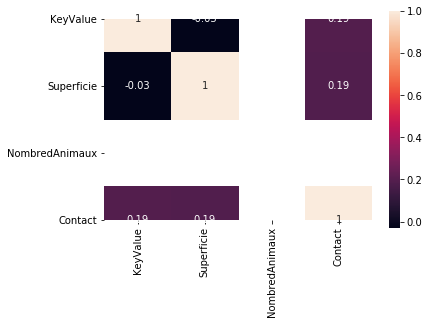

In [92]:
#Correlation Heatmap 

plt.figure()
sns.heatmap(technology_df.corr(), square =True, annot = True)

In [93]:
#Hot coding the data for categorical data 
sex_dummy = pd.get_dummies(pd.DataFrame([*technology_df.Sexe], index = technology_df.Sexe.index).stack()).any(level=0).astype(int)
type_tech_dummy = pd.get_dummies(pd.DataFrame([*technology_df.TypeDeTechnologie], index = technology_df.TypeDeTechnologie.index).stack()).any(level=0).astype(int)
type_recip_dummy = pd.get_dummies(pd.DataFrame([*technology_df.TypeDeRecipiendaire], index = technology_df.TypeDeRecipiendaire.index).stack()).any(level=0).astype(int)
spec_dummy = pd.get_dummies(pd.DataFrame([*technology_df.Speculation], index = technology_df.Speculation.index).stack()).any(level=0).astype(int)
sous_spec_dummy = pd.get_dummies(pd.DataFrame([*technology_df.SousSpeculation], index = technology_df.SousSpeculation.index).stack()).any(level=0).astype(int)
type_menage_dummy = pd.get_dummies(pd.DataFrame([*technology_df.TypeDeMenage], index = technology_df.TypeDeMenage.index).stack()).any(level=0).astype(int)
#nov_con_dummy = pd.get_dummies(pd.DataFrame([*technology_df.NouveauContinue], index = technology_df.NouveauContinue.index).stack()).any(level=0).astype(int)

#Concatenating the dummies to one data table 
technology_df = pd.concat([technology_df, sex_dummy], axis=1)
technology_df = pd.concat([technology_df, type_recip_dummy], axis=1)
technology_df = pd.concat([technology_df, type_menage_dummy], axis=1)
technology_df = pd.concat([technology_df, type_tech_dummy], axis=1)
technology_df = pd.concat([technology_df, sous_spec_dummy], axis=1)
#technology_df = pd.concat([technology_df, nov_con_dummy], axis=1)
technology_df.head()

,KeyValue,Date,DernierJourDuTrimestre,Activite,Localisation,NomDeTechnologie,TypeDeTechnologie,PhaseDeTechnologie,TypeDeRecipiendaire,Superficie,...,Valeur ajoutée des transformation (Value-Added Processing),Ananas (Pineapples),Autre (Other),Boeuf (Beef),Chèvre (Goat),Gombo (Ocra),Irrigation (Irrigation),Mouton (Sheep),Pluies (Rain-fed),Poulet (Chicken)
37,2145,25 Jun 2018,25 Jun 2018,SMARTE,Bureau de Faranah (Exemple de localisation à...,Séchoirs améleoré (solair et electrique)a vent...,Stockage and gestion après récolte (Post Harve...,En essaie sur terrain (Under field testing),Prestataires de service (Service Providers),0.0,...,0,0,1,0,0,0,0,0,0,0
38,2162,07 May 2018,07 May 2018,SMARTE,Bureau de Kindia (Exemple de localisation à ...,Séchoir solaire à Chéminé,Valeur ajoutée des transformation (Value-Added...,Disponible a l'utilisation (Made available for...,Processors,0.0,...,1,1,0,0,0,0,0,0,0,0
39,2144,24 Jun 2018,24 Jun 2018,SMARTE,Bureau de Faranah (Exemple de localisation à...,Demonstration sur le forage manuel,Gestion de l'irrigation et de l'eau (Irrigatio...,En essaie sur terrain (Under field testing),Prestataires de service (Service Providers),0.0,...,0,0,1,0,0,0,0,0,0,0
40,1316,13 Dec 2017,31 Dec 2017,SMARTE,Bureau de Faranah (Exemple de localisation à...,Sechoir à air forcé,Stockage and gestion après récolte (Post Harve...,Disponible a l'utilisation (Made available for...,Producteurs (Producers),0.0,...,0,0,0,0,0,0,1,0,0,0
41,1319,13 Dec 2017,31 Dec 2017,SMARTE,Bureau de Faranah (Exemple de localisation à...,Sechoir à air forcé,Stockage and gestion après récolte (Post Harve...,Disponible a l'utilisation (Made available for...,Producteurs (Producers),0.0,...,0,0,0,0,0,0,1,0,0,0


In [94]:
#Setting the type of each category/column 
technology_df.NombredAnimaux = technology_df.NombredAnimaux.astype(np.int)
technology_df.TypeDeRecipiendaire = technology_df.TypeDeRecipiendaire.astype(np.str)
technology_df.TechnologieAppliquee = technology_df.TechnologieAppliquee.astype(np.bool)

#Changing boolean columens to dummy and/or categories 
technology_df ['older_36'] = pd.get_dummies(technology_df.Age, drop_first=True)
technology_df ['tech_applied'] = pd.get_dummies(technology_df.TechnologieAppliquee, drop_first=True)
technology_df ['new_participant'] = pd.get_dummies(technology_df.NouveauContinue, drop_first = True) 


In [95]:
technology_df.corr()

,KeyValue,Superficie,NombredAnimaux,Contact,TechnologieAppliquee,Conjoint (Joint),Femme (Female),Homme (Male),Prestataires de service (Service Providers),Processors,...,Boeuf (Beef),Chèvre (Goat),Gombo (Ocra),Irrigation (Irrigation),Mouton (Sheep),Pluies (Rain-fed),Poulet (Chicken),older_36,tech_applied,new_participant
KeyValue,1.000000,-0.030490,NaN,0.194892,0.248474,-0.191980,0.070117,-0.021675,0.158817,0.064009,...,0.045273,0.044859,0.004004,-0.016746,0.044756,-0.117599,0.045169,0.745908,0.248474,0.074707
Superficie,-0.030490,1.000000,NaN,0.189309,0.222114,0.305544,-0.035315,-0.040973,-0.018086,-0.003108,...,-0.001257,-0.002197,-0.028796,-0.037789,-0.002197,0.042457,-0.002197,-0.026479,0.222114,0.177758
NombredAnimaux,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Contact,0.194892,0.189309,NaN,1.000000,0.855566,-0.019759,-0.031635,0.036208,0.004882,0.212538,...,0.160849,0.160770,-0.071933,-0.232839,0.149755,-0.035805,0.150366,-0.053113,0.855566,0.474311
TechnologieAppliquee,0.248474,0.222114,NaN,0.855566,1.000000,-0.016919,-0.029835,0.033722,-0.029495,0.251640,...,0.177880,0.177880,-0.055793,-0.199379,0.177880,-0.030659,0.177880,-0.044424,1.000000,0.391757
Conjoint (Joint),-0.191980,0.305544,NaN,-0.019759,-0.016919,1.000000,-0.082571,-0.166758,-0.024775,-0.004258,...,-0.003010,-0.003010,-0.013632,0.027513,-0.003010,0.000502,-0.003010,-0.063108,-0.016919,-0.027073
Femme (Female),0.070117,-0.035315,NaN,-0.031635,-0.029835,-0.082571,1.000000,-0.968862,-0.020992,-0.024737,...,-0.017486,-0.017486,0.006346,0.112848,-0.017486,-0.143032,-0.017486,0.037010,-0.029835,-0.069082
Homme (Male),-0.021675,-0.040973,NaN,0.036208,0.033722,-0.166758,-0.968862,1.000000,0.026924,0.025532,...,0.018048,0.018048,-0.002892,-0.118484,0.018048,0.141388,0.018048,-0.020938,0.033722,0.075074
Prestataires de service (Service Providers),0.158817,-0.018086,NaN,0.004882,-0.029495,-0.024775,-0.020992,0.026924,1.000000,-0.007422,...,-0.005247,-0.005247,0.083991,-0.061855,-0.005247,-0.013912,-0.005247,0.113007,-0.029495,-0.047196
Processors,0.064009,-0.003108,NaN,0.212538,0.251640,-0.004258,-0.024737,0.025532,-0.007422,1.000000,...,-0.000902,-0.000902,-0.019516,-0.050172,-0.000902,-0.007715,-0.000902,0.011892,0.251640,0.074576


In [96]:
technology_df.NombredAnimaux.describe()

count    1570.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: NombredAnimaux, dtype: float64

In [97]:
technology_df.NouveauContinue.describe()

count                      1570
unique                        2
top       Continue (Continuing)
freq                       1493
Name: NouveauContinue, dtype: object

The number of animals owned by an individual is heavily skewed,
dominating closer to people have no animals then animals. The number of animals has to be viewed outside the data, and normalized to fit the model because of when the missing data is dropped. The dropped NA data affects the number of animals the most. Thus to normalize the data, the missing information for the number of animals will be placed with the average.  

In [98]:
copy_tech_df.describe()

,KeyValue,Superficie,NombredAnimaux,Contact
count,3967.000000,3967.000000,3967.000000,3.289000e+03
mean,2483.963448,0.224756,0.078901,2.549055e+08
std,1270.285144,0.669127,1.400805,3.717013e+08
min,283.000000,0.000000,0.000000,0.000000e+00
25%,1390.500000,0.000000,0.000000,0.000000e+00
50%,2393.000000,0.010811,0.000000,0.000000e+00
75%,3549.500000,0.140000,0.000000,6.225416e+08
max,4769.000000,10.618951,52.000000,8.159103e+09


In [99]:
technology_df.describe()

,KeyValue,Superficie,NombredAnimaux,Contact,Conjoint (Joint),Femme (Female),Homme (Male),Prestataires de service (Service Providers),Processors,Producteurs (Producers),...,Boeuf (Beef),Chèvre (Goat),Gombo (Ocra),Irrigation (Irrigation),Mouton (Sheep),Pluies (Rain-fed),Poulet (Chicken),older_36,tech_applied,new_participant
count,1570.000000,1570.000000,1570.0,1.570000e+03,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,...,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000
mean,1284.324841,0.009350,0.0,1.685596e+07,0.014013,0.324204,0.661783,0.041401,0.001274,0.957325,...,0.000637,0.000637,0.229936,0.663694,0.000637,0.044586,0.000637,0.342038,0.019745,0.049045
std,488.466381,0.107468,0.0,1.017310e+08,0.117581,0.468226,0.473253,0.199280,0.035680,0.202188,...,0.025238,0.025238,0.420926,0.472595,0.025238,0.206459,0.025238,0.474543,0.139168,0.216030
min,290.000000,0.000000,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,865.250000,0.000000,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1261.500000,0.000000,0.0,0.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1703.750000,0.000000,0.0,0.000000e+00,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,3877.000000,2.500000,0.0,6.661162e+08,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Graphical Representation of the Data

Looking at the data to see what the original data can tell me. 

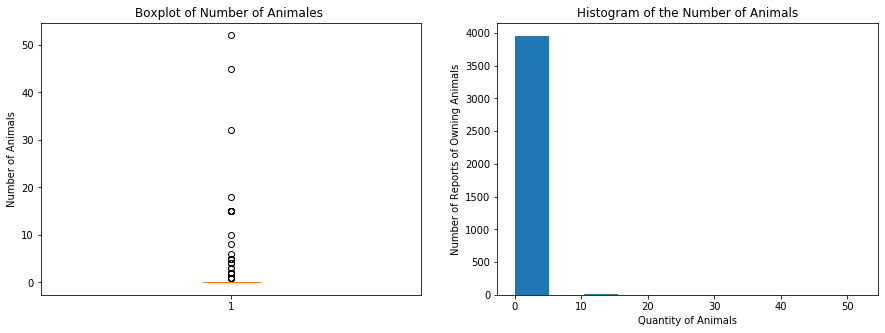

In [100]:
# Graphical Representatio of the data 

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.boxplot(copy_tech_df ['NombredAnimaux'])
plt.ylabel('Number of Animals')
plt.title('Boxplot of Number of Animales ')

plt.subplot(1,2,2)
plt.hist(copy_tech_df ['NombredAnimaux'])
plt.xlabel('Quantity of Animals')
plt.ylabel('Number of Reports of Owning Animals')
plt.title('Histogram of the Number of Animals')

plt.show()

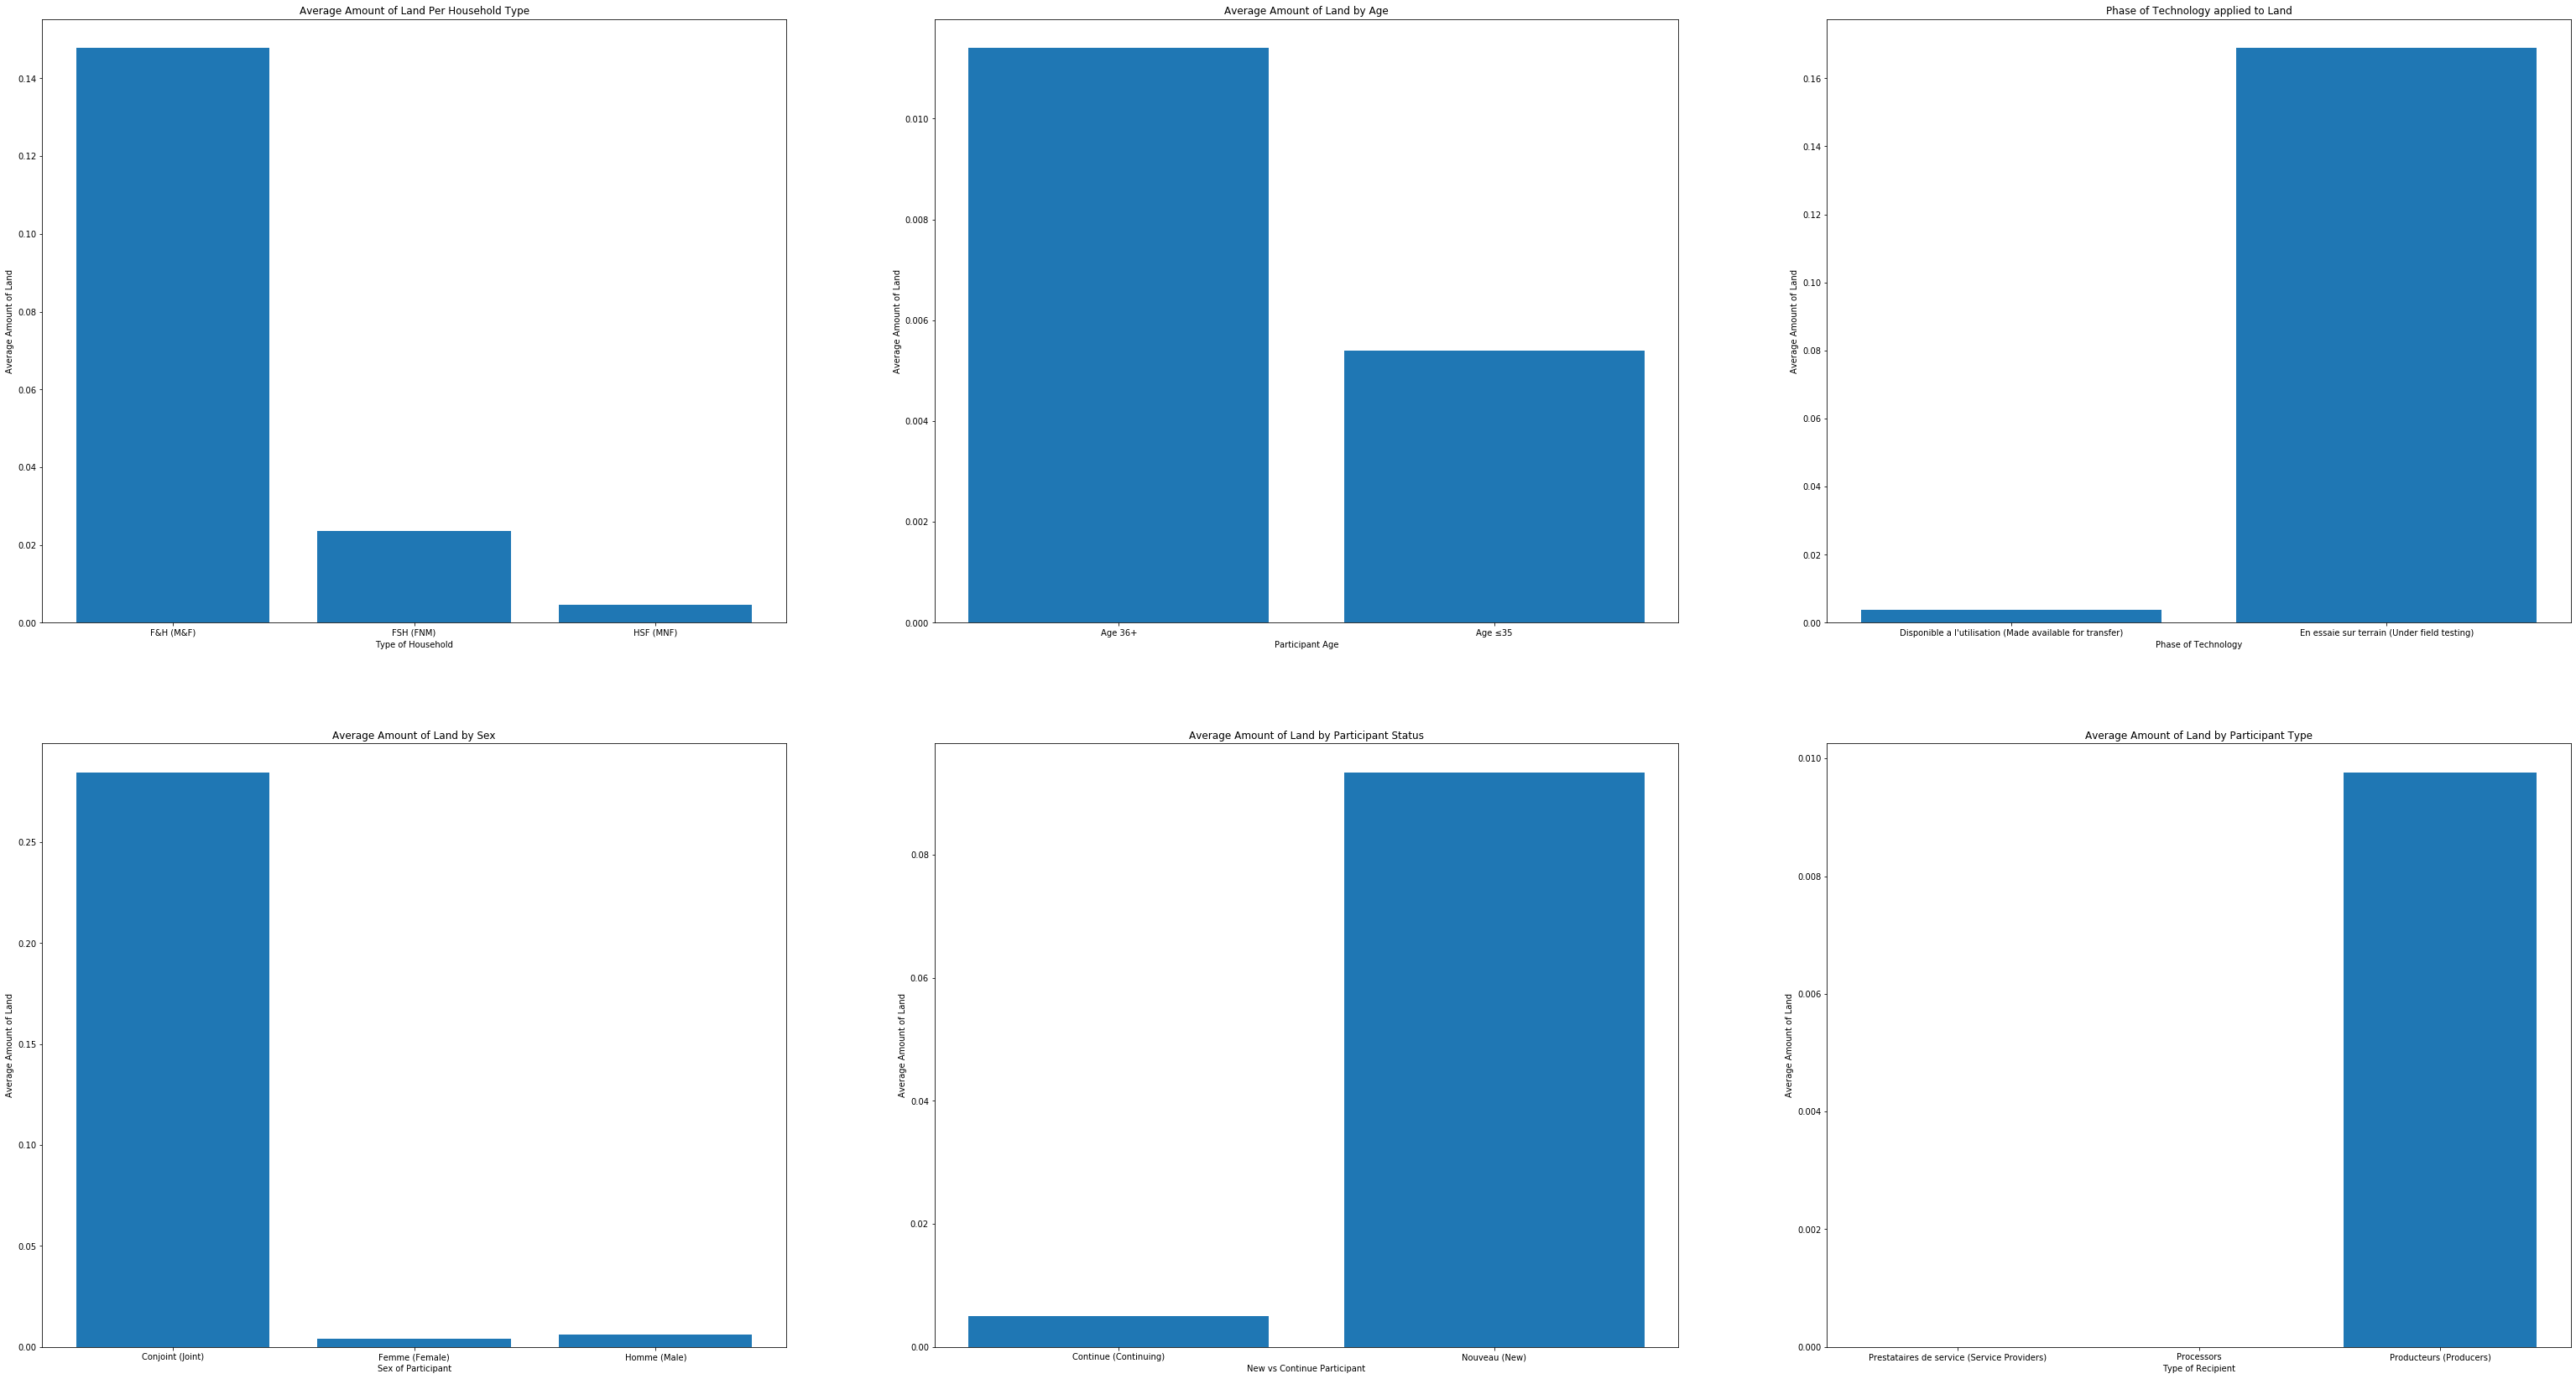

In [101]:
plt.figure(figsize =(54,45))

plt.subplot(3,3,1)
plt.bar(technology_df.groupby(technology_df.TypeDeMenage)['Superficie'].mean().index, technology_df.groupby(technology_df.TypeDeMenage) ['Superficie'].mean())
plt.xlabel('Type of Household')
plt.ylabel('Average Amount of Land')
plt.title('Average Amount of Land Per Household Type')

plt.subplot(3,3,2)
plt.bar(technology_df.groupby(technology_df.Age)['Superficie'].mean().index, technology_df.groupby(technology_df.Age) ['Superficie'].mean())
plt.xlabel('Participant Age')
plt.ylabel('Average Amount of Land')
plt.title('Average Amount of Land by Age')

plt.subplot(3,3,3)
plt.bar(technology_df.groupby(technology_df.PhaseDeTechnologie)['Superficie'].mean().index, technology_df.groupby(technology_df.PhaseDeTechnologie) ['Superficie'].mean())
plt.xlabel('Phase of Technology')
plt.ylabel('Average Amount of Land')
plt.title('Phase of Technology applied to Land')

plt.subplot(3,3,4)
plt.bar(technology_df.groupby(technology_df.Sexe)['Superficie'].mean().index, technology_df.groupby(technology_df.Sexe) ['Superficie'].mean())
plt.xlabel('Sex of Participant')
plt.ylabel('Average Amount of Land')
plt.title('Average Amount of Land by Sex')

plt.subplot(3,3,5)
plt.bar(technology_df.groupby(technology_df.NouveauContinue)['Superficie'].mean().index, technology_df.groupby(technology_df.NouveauContinue) ['Superficie'].mean())
plt.xlabel('New vs Continue Participant')
plt.ylabel('Average Amount of Land')
plt.title('Average Amount of Land by Participant Status')

plt.subplot(3,3,6)
plt.bar(technology_df.groupby(technology_df.TypeDeRecipiendaire)['Superficie'].mean().index, technology_df.groupby(technology_df.TypeDeRecipiendaire) ['Superficie'].mean())
plt.xlabel('Type of Recipient')
plt.ylabel('Average Amount of Land')
plt.title('Average Amount of Land by Participant Type')

plt.show()

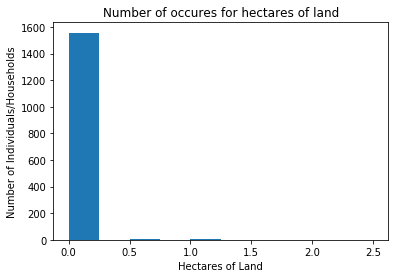

In [102]:
plt.hist(technology_df.Superficie)
plt.xlabel('Hectares of Land')
plt.ylabel('Number of Individuals/Households')
plt.title('Number of occures for hectares of land')
plt.show()

The hectares of land is heavily skewed to the left. More individuals have hectares of land less than 1-2 hectares. 

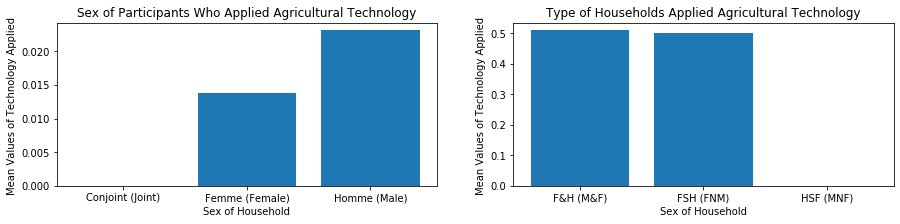

In [103]:
plt.figure(figsize=(15,3))

plt.subplot(1,2,1)
# Graphical Representatio of the data 
plt.bar(technology_df.groupby(technology_df.Sexe)['TechnologieAppliquee'].mean().index, technology_df.groupby(technology_df.Sexe) ['TechnologieAppliquee'].mean())
plt.xlabel('Sex of Household')
plt.ylabel('Mean Values of Technology Applied ')
plt.title('Sex of Participants Who Applied Agricultural Technology')

plt.subplot(1,2,2)
# Graphical Representatio of the data 
plt.bar(technology_df.groupby(technology_df.TypeDeMenage)['TechnologieAppliquee'].mean().index, technology_df.groupby(technology_df.TypeDeMenage) ['TechnologieAppliquee'].mean())
plt.xlabel('Sex of Household')
plt.ylabel('Mean Values of Technology Applied ')
plt.title('Type of Households Applied Agricultural Technology')

plt.show()

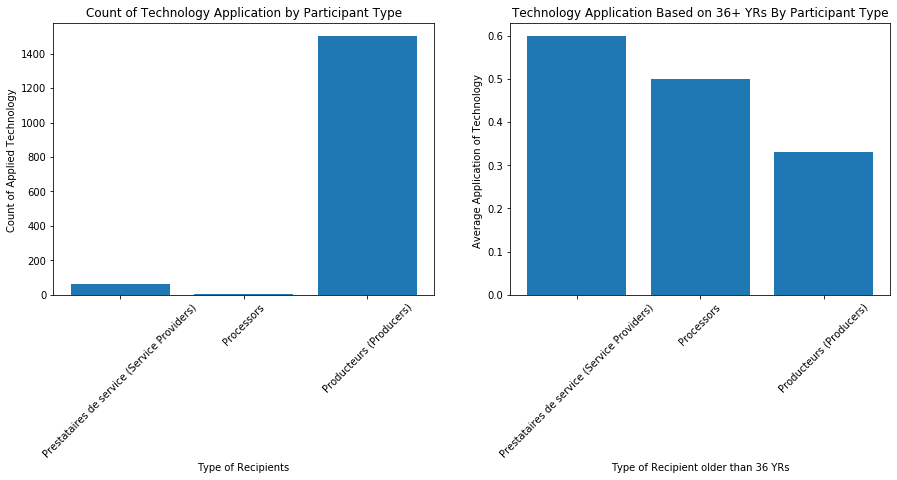

In [104]:
# Graphical Representatio of the data 
plt.figure(figsize =(15,5))

plt.subplot(1,2,1)
plt.bar(technology_df.groupby('TypeDeRecipiendaire')['TechnologieAppliquee'].mean().index, technology_df.groupby('TypeDeRecipiendaire') ['TechnologieAppliquee'].count())
plt.xlabel('Type of Recipients')
plt.xticks(rotation=45)
plt.ylabel('Count of Applied Technology ')
plt.title('Count of Technology Application by Participant Type')

plt.subplot(1,2,2)
plt.bar(technology_df.groupby('TypeDeRecipiendaire')['older_36'].mean().index, technology_df.groupby('TypeDeRecipiendaire') ['older_36'].mean())
plt.xlabel('Type of Recipient older than 36 YRs')
plt.xticks(rotation=45)
plt.ylabel('Average Application of Technology ')
plt.title('Technology Application Based on 36+ YRs By Participant Type')

plt.show()

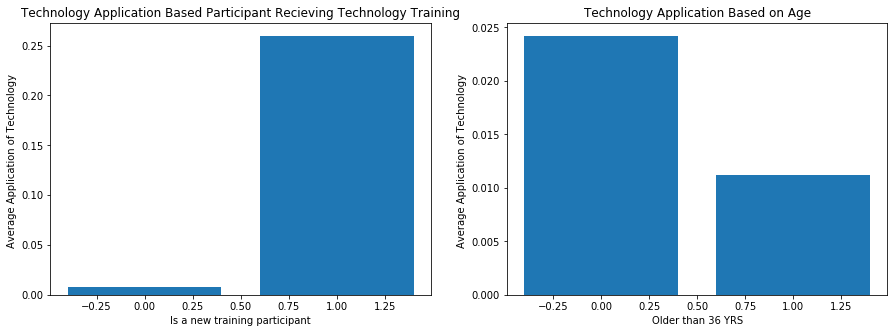

In [105]:
# Graphical Representatio of the data 

plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.bar(technology_df.groupby('new_participant')['TechnologieAppliquee'].mean().index, technology_df.groupby('new_participant') ['TechnologieAppliquee'].mean())
plt.xlabel('Is a new training participant')
plt.ylabel('Average Application of Technology ')
plt.title('Technology Application Based Participant Recieving Technology Training')


plt.subplot(1,2,2)
plt.bar(technology_df.groupby('older_36')['TechnologieAppliquee'].mean().index, technology_df.groupby('older_36') ['TechnologieAppliquee'].mean())
plt.xlabel('Older than 36 YRS')
plt.ylabel('Average Application of Technology ')
plt.title('Technology Application Based on Age')


plt.show()

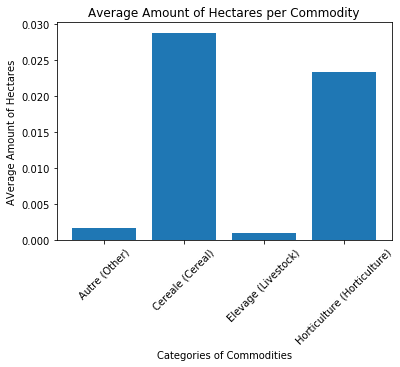

In [106]:
plt.bar(technology_df.groupby('Speculation')['Superficie'].mean().index, technology_df.groupby('Speculation')['Superficie'].mean())
plt.xlabel('Categories of Commodities')
plt.xticks(rotation=45)
plt.ylabel('AVerage Amount of Hectares')
plt.title('Average Amount of Hectares per Commodity')
plt.show()

In [107]:
print(technology_df.Speculation.describe())

count              1570
unique                4
top       Autre (Other)
freq               1027
Name: Speculation, dtype: object


# Building the Model 
Building out a predictive model to address the factors contributing to a participant applying 
a new agricultural technology introduced into an environment 

In [108]:
import statsmodels.api as sm 
from sklearn import linear_model as linModel 

In [109]:
Y = technology_df ['tech_applied']
X = technology_df [['older_36', 'Producteurs (Producers)', 'Prestataires de service (Service Providers)', 'new_participant', 'Superficie', 'Femme (Female)', 'Production (Production)', 'F&H (M&F)']]

X = sm.add_constant(X)

results = sm.OLS(Y,X).fit()
results.summary()

c:\users\samuel.sesay\appdata\local\programs\python\python37-32\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           tech_applied   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     155.4
Date:                Fri, 28 Feb 2020   Prob (F-statistic):          1.98e-192
Time:                        22:24:31   Log-Likelihood:                 1328.7
No. Observations:                1570   AIC:                            -2639.
Df Residuals:                    1561   BIC:                            -2591.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                           0.5336      0.075      7.078      0.000       0.386       0.681
older_36                                        0.0008      0.006      0.143      0.886      -0.010       0.012
Producteurs (Producers)                        -0.5338      0.075     -7.083      0.000      -0.682      -0.386
Prestataires de service (Service Providers)    -0.5574      0.076     -7.303      0.000      -0.707      -0.408
new_participant                                 0.0384      0.015      2.638      0.008       0.010       0.067
Superficie                                      0.1004      0.025      3.976      0.000       0.051       0.150
Femme (Female)                                  0.0053      0.006      0.940      0.347      -0.006       0.016
Production (Production)                         0.0028      0.006      0.490      0.624      -0.008       0.014
F&H (M&F)                                       0.4468      0.018     24.341      0.000       0.411       0.483
==============================================================================
Omnibus:                     1171.393   Durbin-Watson:                   0.783
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            98061.551
Skew:                           2.784   Prob(JB):                         0.00
Kurtosis:                      41.315   Cond. No.                         75.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [110]:
# Negative AIC indicates less information loss than a positive AIC and therefore a better model.

In [111]:
technology_df.TypeDeTechnologie.unique()
technology_df.TypeDeMenage.unique()

array(['F&H (M&F)', 'HSF (MNF)', 'FSH (FNM)'], dtype=object)

In [112]:
Y_two = technology_df ['tech_applied']
X_two = technology_df [['older_36', 'Producteurs (Producers)', 'Prestataires de service (Service Providers)', 'new_participant']]

lrm = linModel.LinearRegression()
lrm.fit(X,Y)

X_two = sm.add_constant(X_two)

results_two = sm.OLS(Y_two,X_two).fit()
results_two.summary()

c:\users\samuel.sesay\appdata\local\programs\python\python37-32\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           tech_applied   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     100.5
Date:                Fri, 28 Feb 2020   Prob (F-statistic):           3.45e-76
Time:                        22:24:31   Log-Likelihood:                 1048.3
No. Observations:                1570   AIC:                            -2087.
Df Residuals:                    1565   BIC:                            -2060.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                           0.8843      0.088     10.019      0.000       0.711       1.057
older_36                                       -0.0093      0.007     -1.393      0.164      -0.022       0.004
Producteurs (Producers)                        -0.8741      0.088     -9.910      0.000      -1.047      -0.701
Prestataires de service (Service Providers)    -0.8788      0.090     -9.815      0.000      -1.054      -0.703
new_participant                                 0.2406      0.015     16.489      0.000       0.212       0.269
==============================================================================
Omnibus:                     1736.780   Durbin-Watson:                   0.609
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           111131.086
Skew:                           5.629   Prob(JB):                         0.00
Kurtosis:                      42.649   Cond. No.                         70.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Model One performs better than the second model for the following reasons: 
 - F squared is higher in the first model versus the second, stating that the features explain 44% of the dependent variable 
 - The p value for the F statistics is much smalled; rejecting the null hypothesis and stating that the first model is distinguishable from a featureless model 
 - The coefficient values are statistically releveant based on the p value for the T statistice except for older_36 and Production (production) variables in the first model 
 - The first model is skewed but the JB probablility is 0 


# Training and Testing Data 

In [113]:
#Creating the training and test set of data and applying it to the first model 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

# We fit an OLS model using statsmodels
results_train = sm.OLS(y_train, X_train).fit()

results_train.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           tech_applied   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     151.5
Date:                Fri, 28 Feb 2020   Prob (F-statistic):          6.64e-178
Time:                        22:24:31   Log-Likelihood:                 1116.6
No. Observations:                1256   AIC:                            -2215.
Df Residuals:                    1247   BIC:                            -2169.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                           0.5315      0.073      7.327      0.000       0.389       0.674
older_36                                        0.0044      0.006      0.737      0.462      -0.007       0.016
Producteurs (Producers)                        -0.5319      0.072     -7.337      0.000      -0.674      -0.390
Prestataires de service (Service Providers)    -0.5528      0.074     -7.503      0.000      -0.697      -0.408
new_participant                                 0.0140      0.016      0.864      0.388      -0.018       0.046
Superficie                                      0.1280      0.025      5.186      0.000       0.080       0.176
Femme (Female)                                 -0.0025      0.006     -0.407      0.684      -0.014       0.009
Production (Production)                         0.0035      0.006      0.580      0.562      -0.008       0.016
F&H (M&F)                                       0.4593      0.019     24.065      0.000       0.422       0.497
==============================================================================
Omnibus:                      712.649   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            58163.359
Skew:                           1.755   Prob(JB):                         0.00
Kurtosis:                      36.152   Cond. No.                         67.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [114]:
predictions = results_train.predict(X_test)
error = Y - predictions

bart_stats = bartlett (predictions, error)
lev_stats = levene (predictions, error)

cross_val_score(lrm, X, Y, cv=5)

c:\users\samuel.sesay\appdata\local\programs\python\python37-32\lib\site-packages\numpy\lib\function_base.py:3405: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
c:\users\samuel.sesay\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
c:\users\samuel.sesay\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
c:\users\samuel.sesay\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


array([ 0.55433317,  0.        ,  0.        , -1.13437368,  0.0108427 ])

The data isn't balanced across the datasets, possibly due to the heterodasticity in the errors 

In [115]:
print('Bartlett Results are: {}'.format(bart_stats))

Bartlett Results are: BartlettResult(statistic=129.72819956560167, pvalue=4.699121973427597e-30)


- Heteroscadisticity exists within the data as a result of the Bartlett test and the Skew/Kurtosis, indicating the data has tails (kurtosis). 
- The model is underfitted 

# Decision Tree Model

(attempting a decision tree model to view the utilization of a technology by a participant) 

In [116]:


decision_tech_df = pd.DataFrame()

#Hot coding the data for categorical data 
decision_tech_df ['older_36']  = technology_df.older_36
decision_tech_df ['tech_applied'] = technology_df.tech_applied
decision_tech_df ['new_participant'] = technology_df.new_participant

#nov_con_dummy = pd.get_dummies(pd.DataFrame([*technology_df.NouveauContinue], index = technology_df.NouveauContinue.index).stack()).any(level=0).astype(int)


In [122]:
# Initialize and train the tree 
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4,
    random_state = 1337
)

decision_tree.fit(decision_tech_df, Y)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=decision_tech_df.columns,
    class_names=['Will Apply', 'Will Not Apply'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())


InvocationException: GraphViz's executables not found